In [1]:
from collections import defaultdict

import wandb
import jax
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
def ema(x, alpha=0.2):
    s_t = x[0]
    for i, x_t in enumerate(x[1:]):
        s_t = alpha * x_t + (1 - alpha) * s_t
        x[i + 1] = s_t
    return x

In [3]:
api = wandb.Api()
runs = api.runs("arxaqapi/Brax bench")

In [4]:

def plot_stat(stat: str = "eval.mean_fit"):
    data = defaultdict(lambda: {})

    # Retrieve the data and smoothes it
    for run in runs:
        mean_fit_hist = run.history(samples=1000, keys=[stat]).to_numpy()[:, -1]
        data[run.config["problem"]["environnment"]][run.tags[0]] = ema(mean_fit_hist)

    # Plot the data, grouped by task
    for task_name in data.keys():
        plt.figure(figsize=(16, 9))
        for k, v in data[task_name].items():
            plt.plot(v, label=k, alpha=1, linewidth=0.9)
        plt.title(f"{stat}\npL2 vs learned distance function on {task_name}")
        plt.xlabel("n° generations")
        plt.ylabel("fitness")
        plt.legend()
        plt.show()

---

## Sample mean fitness comparison between the learned distance function and pL2

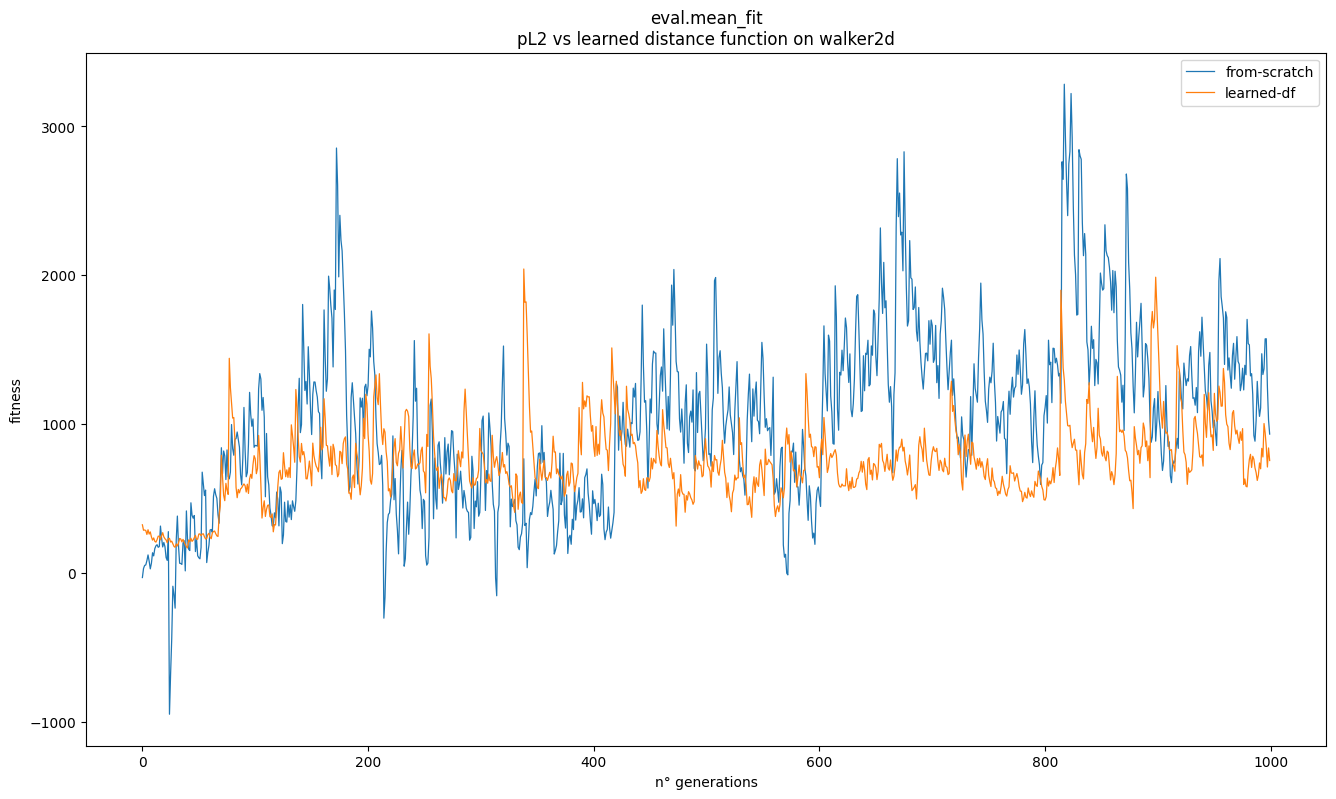

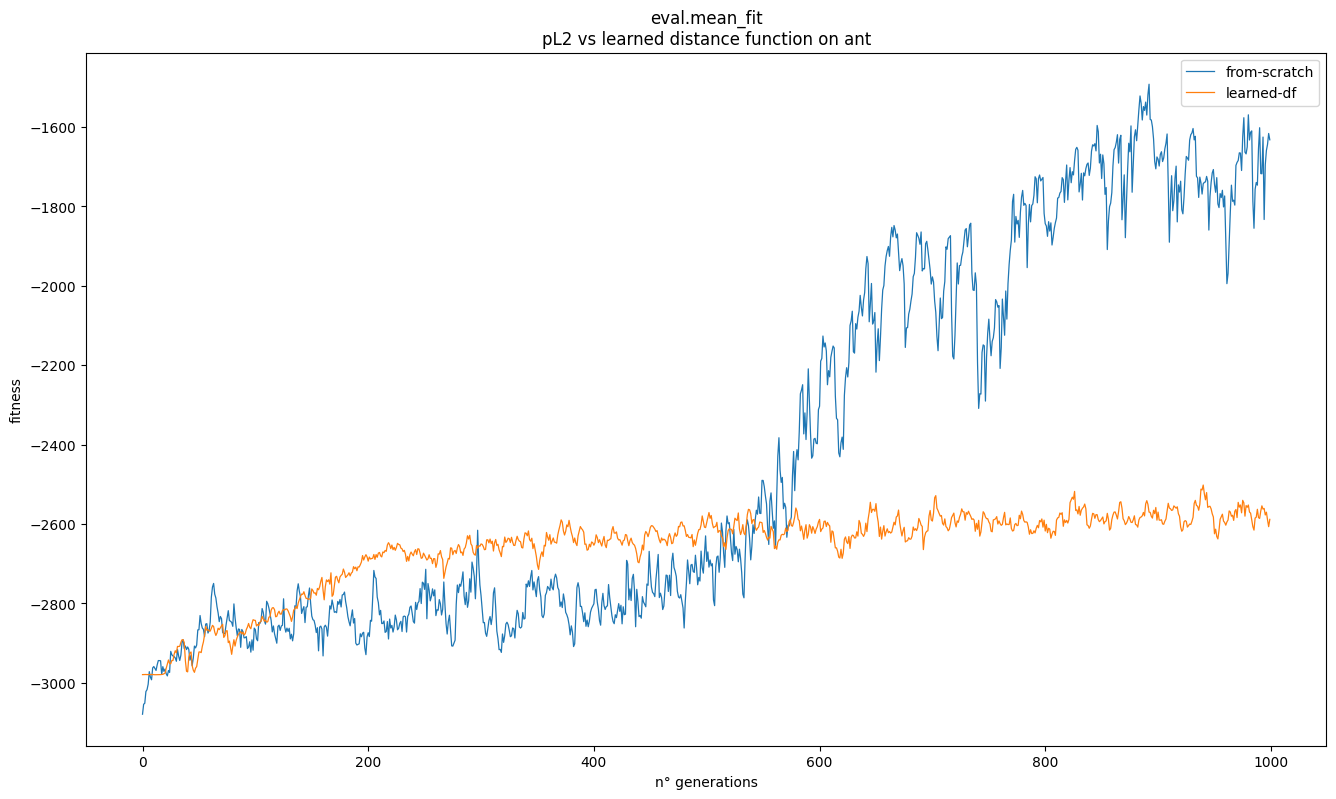

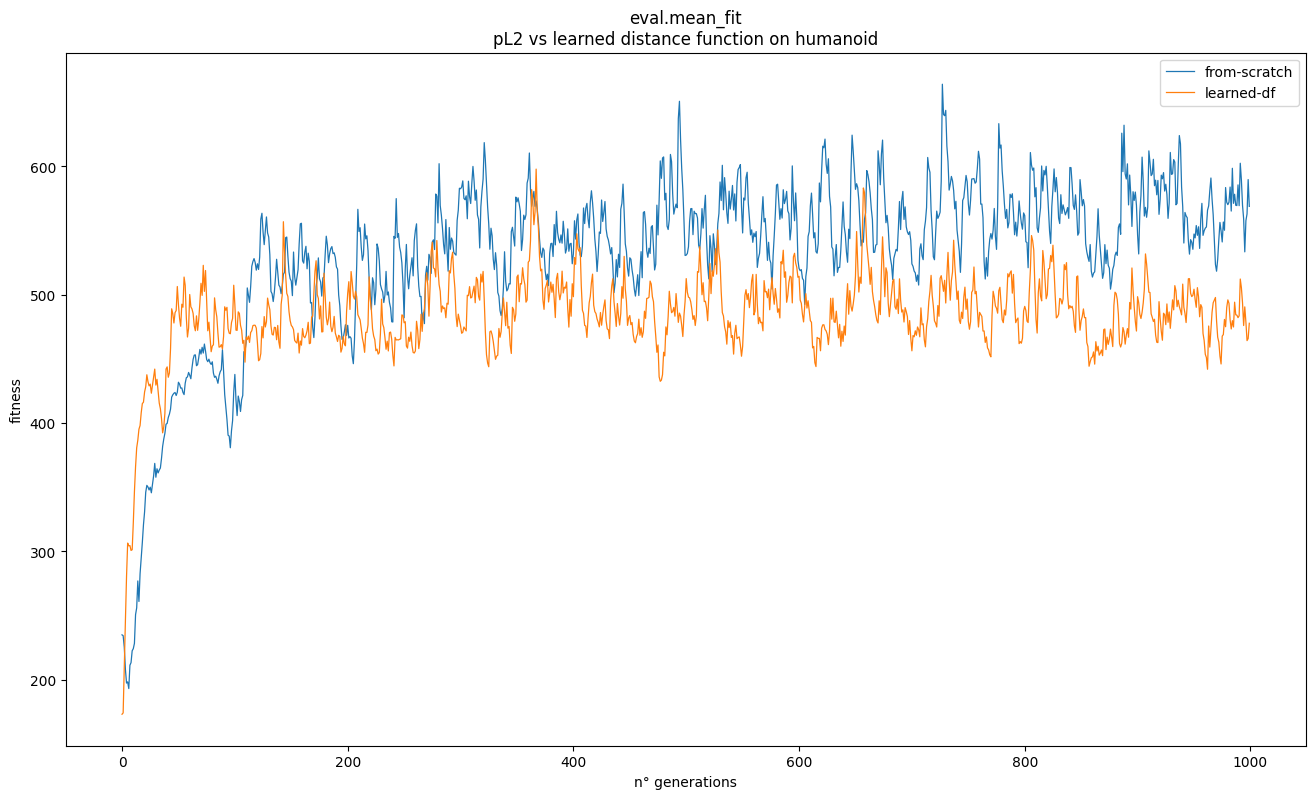

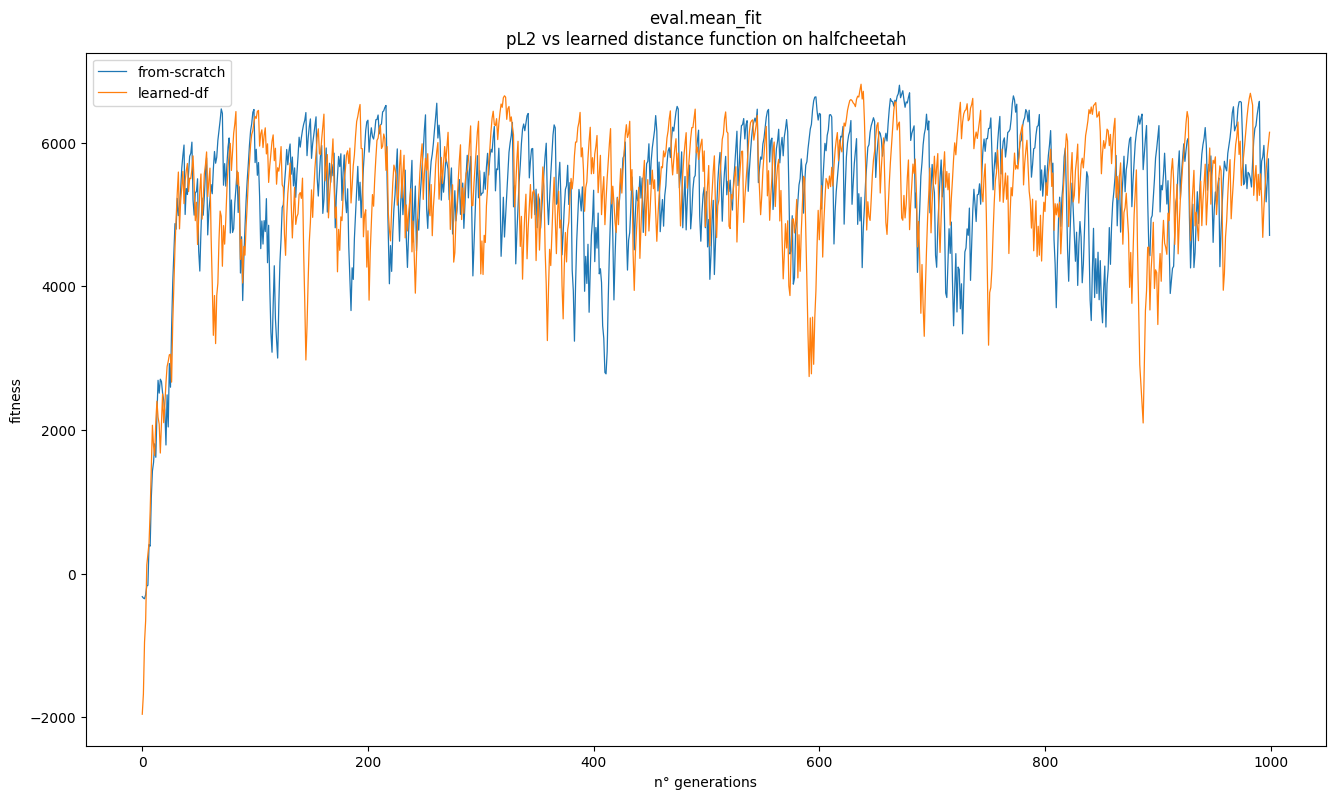

In [5]:
plot_stat()

---

## Best individual fitness comparison between the learned distance function and pL2

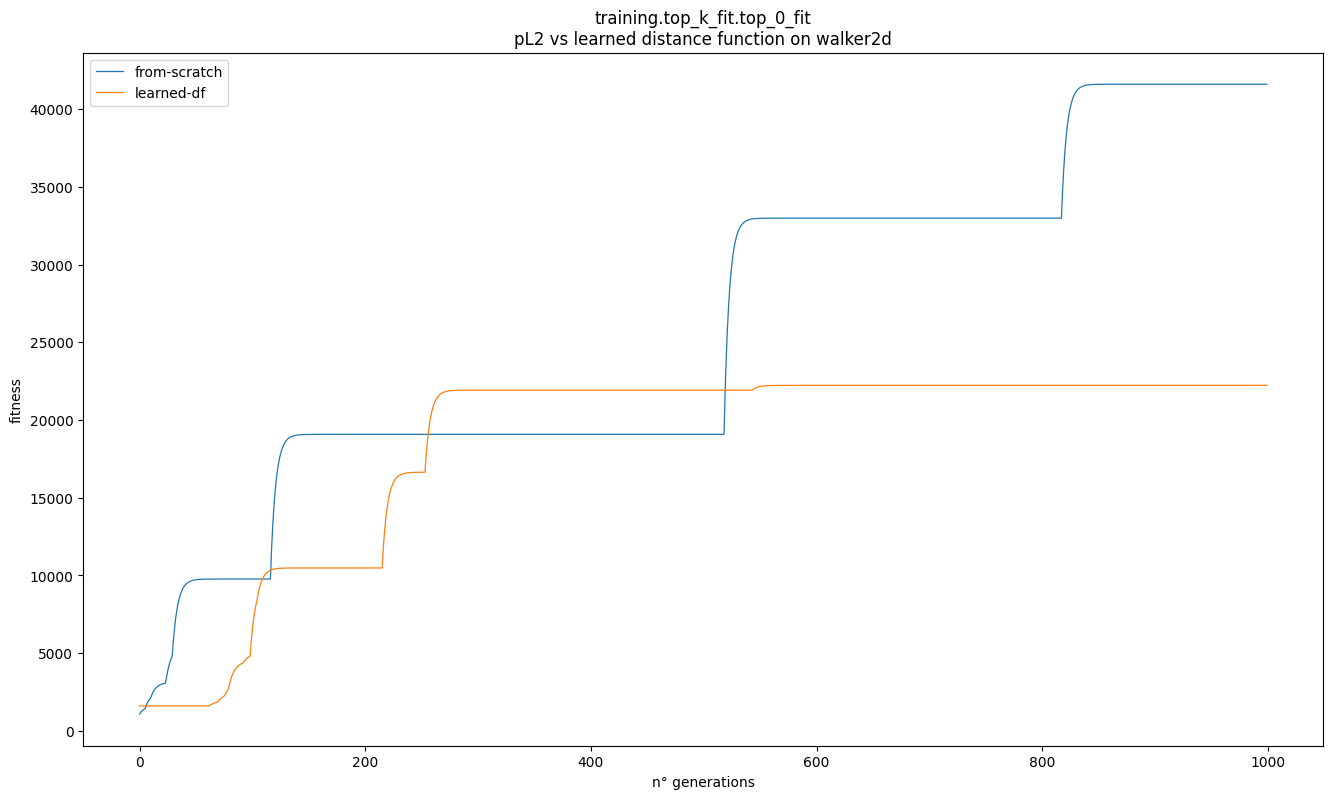

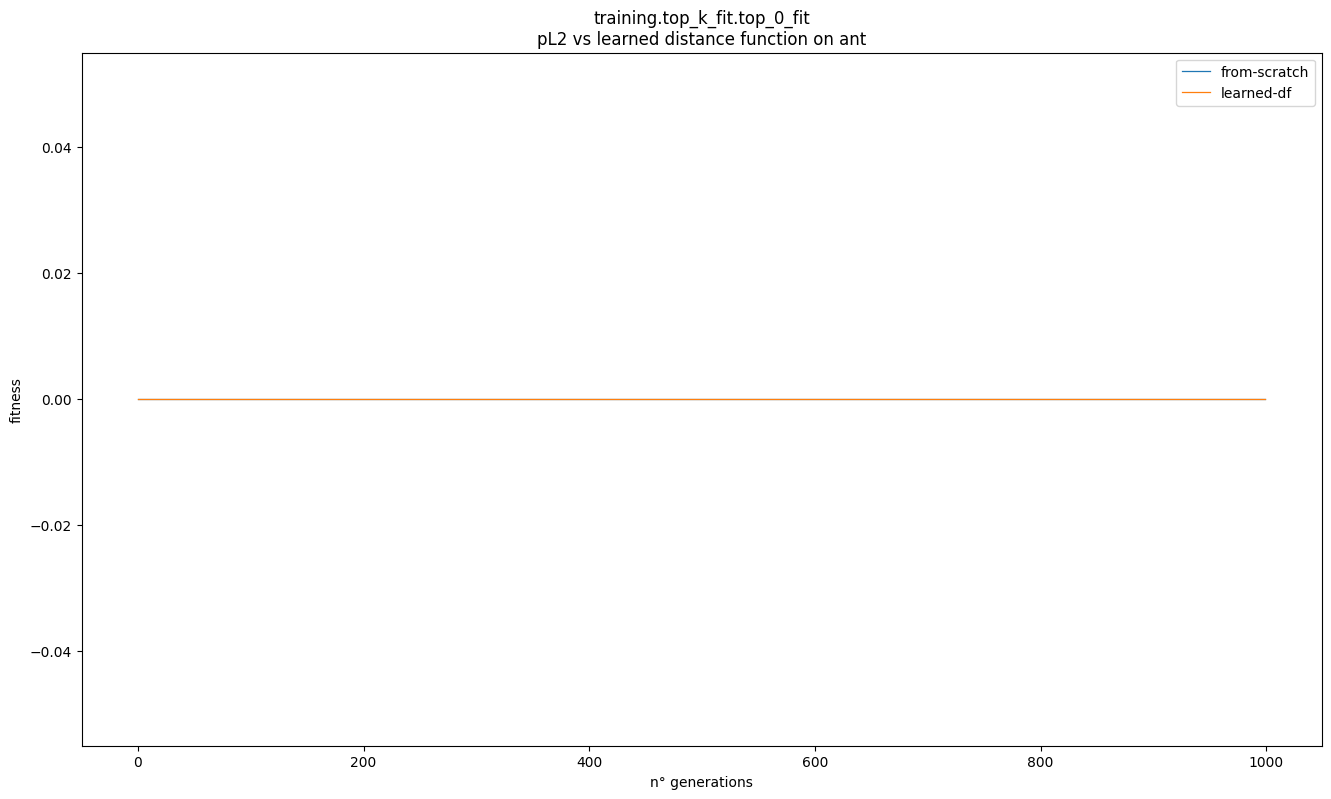

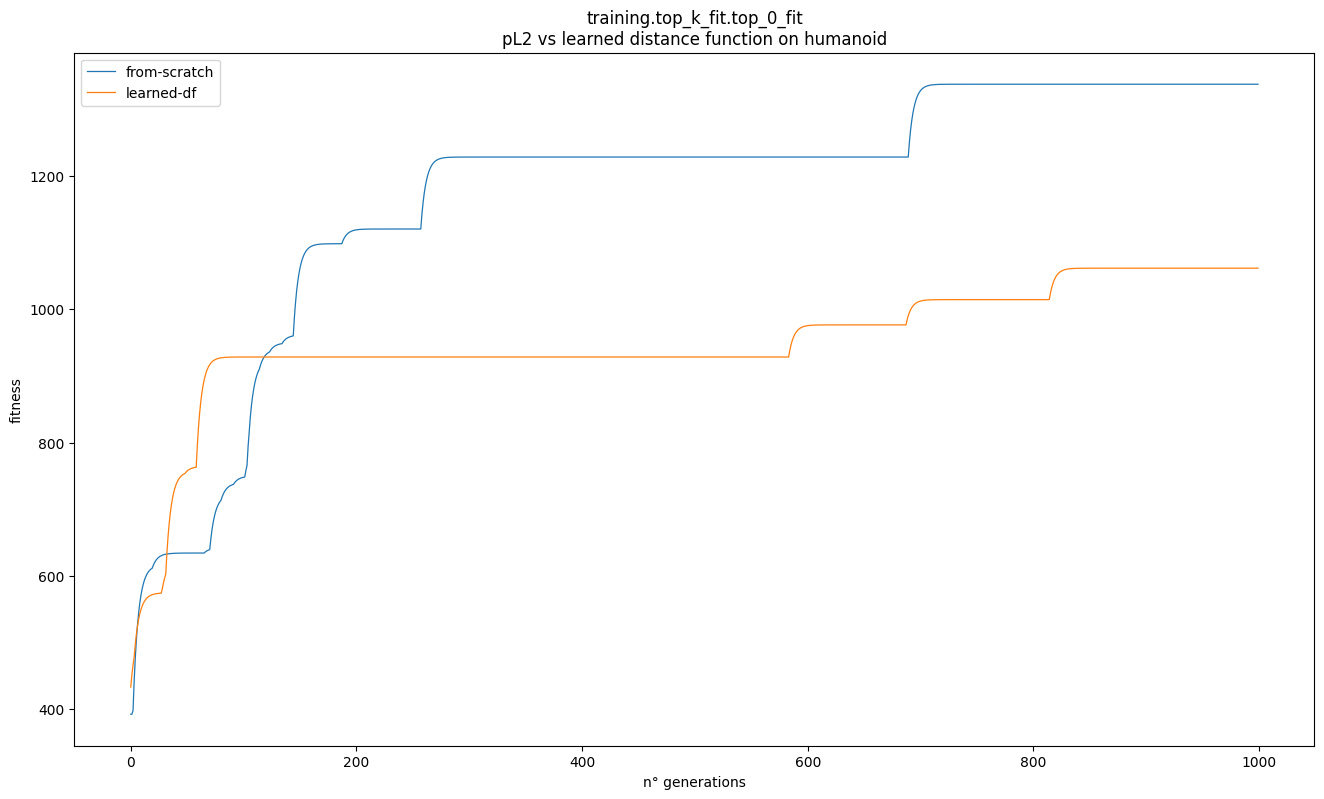

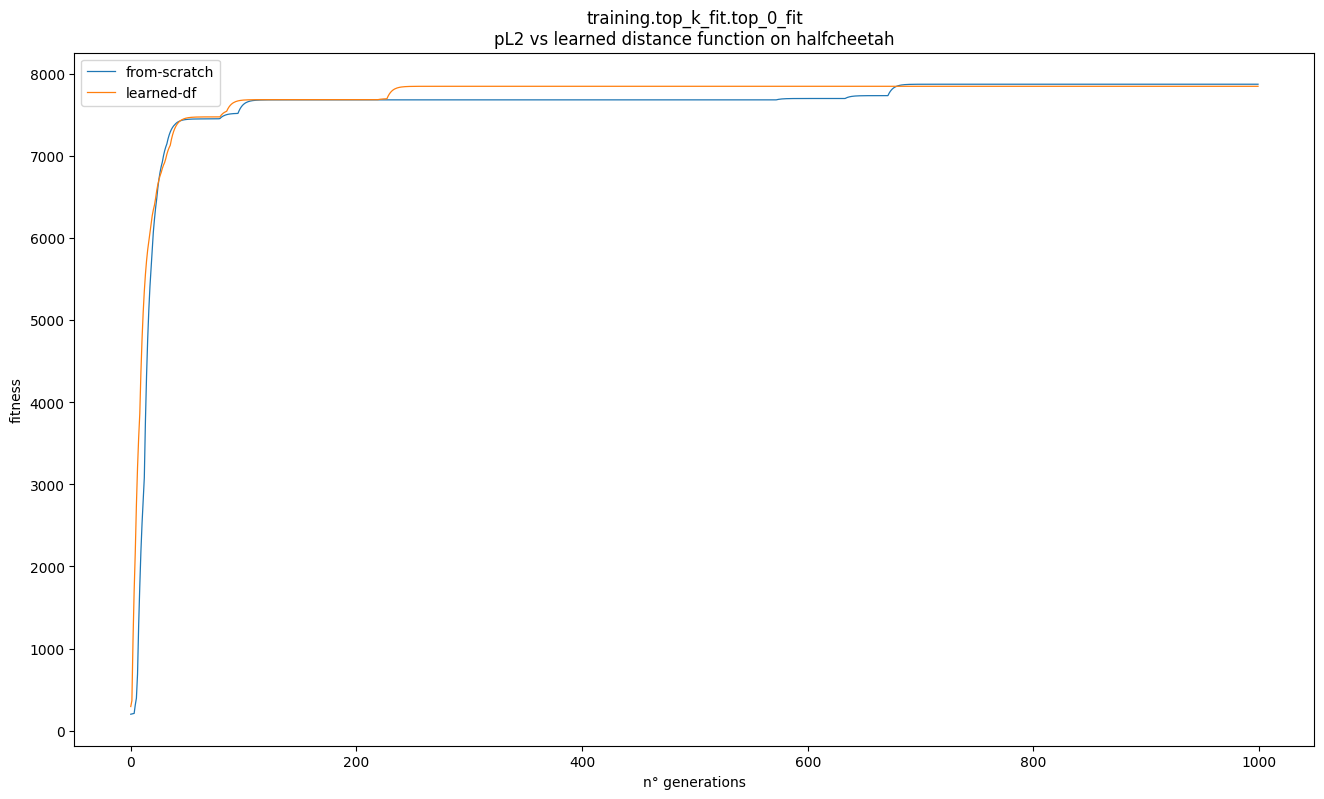

In [6]:
plot_stat("training.top_k_fit.top_0_fit")